In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 读取数据，昵称列对我们分析没有意义，直接去掉。
data = pd.read_csv("comment.csv", usecols=["time", "city", "gender", "level",
"score", "comment"])
print(data.shape)
display(data.head())

(578760, 6)


,time,city,gender,level,score,comment
0,2019-08-13 14:53:57,杭州,1,1,5.0,很不错的电影
1,2019-08-13 14:53:49,上海,0,4,5.0,人物丰满 情节紧凑 难得的好片 喜欢！
2,2019-08-13 14:53:48,黔南,0,1,5.0,超级好看，哪咤和敖丙超级帅
3,2019-08-13 14:53:44,郑州,2,3,4.5,好看好看好看
4,2019-08-13 14:53:43,信宜,0,2,5.0,为国产动画电影打call，第一次给电影写评论，十分好评！哪咤给了我特效的惊喜，也给了我情感上...


In [3]:
data.isnull().sum()

time         0
city       226
gender       0
level        0
score        0
comment      4
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578760 entries, 0 to 578759
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     578760 non-null  object 
 1   city     578534 non-null  object 
 2   gender   578760 non-null  int64  
 3   level    578760 non-null  int64  
 4   score    578760 non-null  float64
 5   comment  578756 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 26.5+ MB


In [5]:
data["city"].fillna("未知", inplace=True)
# 删除没有评论的数据。
data.dropna(inplace=True)
data.isnull().sum()

time       0
city       0
gender     0
level      0
score      0
comment    0
dtype: int64

In [6]:
print(data.duplicated().sum())
display(data[data.duplicated()].iloc[:5])

224


,time,city,gender,level,score,comment
2141,2019-08-13 11:53:54,佛山,2,1,5.0,好看，带儿子一起看的。画面制作精良，场面震撼。看到李靖愿拿换灵符替哪吒遭天雷劫，父母的爱终感...
6889,2019-08-12 21:43:45,汕头,1,1,5.0,***好看!
8218,2019-08-12 20:49:37,慈利,0,2,5.0,真的很满足 多次戳中泪点 真的很震撼 棒棒棒!👍
8897,2019-08-12 20:06:29,九江,2,2,5.0,二刷了！！！巨好看！！！！
9629,2019-08-12 19:19:28,东方,0,3,5.0,我看了两次！


In [7]:
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0


In [8]:
import re

pattern = r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+"
re_obj = re.compile(pattern)

# A方案
def clear(text):
    return re.sub(pattern, "", text)

# B方案
def clear(text):
    return re_obj.sub("", text)

data["comment"] = data["comment"].apply(clear)

In [9]:
import re
re_obj = re.compile(r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+")

def clear(text):
    return re_obj.sub("", text)

data["comment"] = data["comment"].apply(clear)
data.head()

,time,city,gender,level,score,comment
0,2019-08-13 14:53:57,杭州,1,1,5.0,很不错的电影
1,2019-08-13 14:53:49,上海,0,4,5.0,人物丰满情节紧凑难得的好片喜欢
2,2019-08-13 14:53:48,黔南,0,1,5.0,超级好看哪咤和敖丙超级帅
3,2019-08-13 14:53:44,郑州,2,3,4.5,好看好看好看
4,2019-08-13 14:53:43,信宜,0,2,5.0,为国产动画电影打call第一次给电影写评论十分好评哪咤给了我特效的惊喜也给了我情感上的感动我...


In [10]:
import jieba

s = "今天，外面下了一场很大的雨。"
# cut与lcut的区别：前者返回生成器，后者返回列表。
words = jieba.cut(s)
print(words)
print(list(words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


<generator object Tokenizer.cut at 0x000001C63F28DB48>


Loading model cost 1.202 seconds.
Prefix dict has been built successfully.


['今天', '，', '外面', '下', '了', '一场', '很大', '的', '雨', '。']


In [11]:
words = jieba.lcut(s)
print(words)

['今天', '，', '外面', '下', '了', '一场', '很大', '的', '雨', '。']


In [12]:
def cut_word(text):
    return jieba.cut(text)

data["comment"] = data["comment"].apply(cut_word)

In [13]:
data.sample(5)

,time,city,gender,level,score,comment
165232,2019-08-05 21:45:11,金华,0,2,4.5,<generator object Tokenizer.cut at 0x000001C64...
69065,2019-08-09 21:46:46,郑州,0,2,5.0,<generator object Tokenizer.cut at 0x000001C63...
489573,2019-07-28 14:14:53,内江,2,2,5.0,<generator object Tokenizer.cut at 0x000001C65...
171820,2019-08-05 18:34:12,定州,1,1,5.0,<generator object Tokenizer.cut at 0x000001C64...
568513,2019-07-26 17:06:28,重庆,0,1,5.0,<generator object Tokenizer.cut at 0x000001C65...


In [14]:
def get_stopword():
    s = set()
    with open("stopword.txt", encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
data["comment"] = data["comment"].apply(remove_stopword)
data.sample(5)

,time,city,gender,level,score,comment
540001,2019-07-27 11:55:05,宜良县,2,1,5.0,"[国漫, 巅峰, 之作]"
81567,2019-08-09 11:51:19,佛山,1,1,5.0,"[挺, 好看]"
506983,2019-07-27 23:06:32,哈尔滨,2,2,5.0,"[好看, 好看, 强烈推荐]"
464083,2019-07-28 21:07:33,唐山,0,2,5.0,"[刺激, 两盒, 烟量, 愣, 憋着, 抽]"
22991,2019-08-11 21:59:32,重庆,0,0,5.0,"[真的, 炒鸡, 好看, 太乙, 真人, 搞笑, 哪吒, 敖丙, 真的, 炒鸡, 感人]"


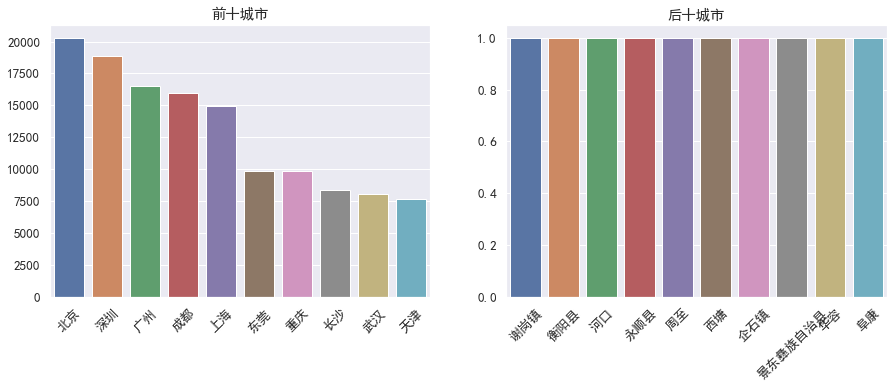

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
count = data["city"].value_counts()
top = count.iloc[:10]
bottom = count.iloc[-10:]
for index, d, title in zip(range(2), [top, bottom], ["前十城市", "后十城市"]):
    a = sns.barplot(d.index, d.values, ax=ax[index])
    # 旋转45度，避免字体重叠。
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    a.set_title(title)

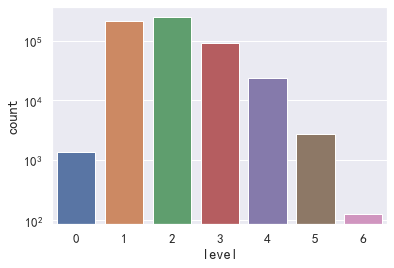

In [16]:
sns.countplot(x="level", data=data, log=True)

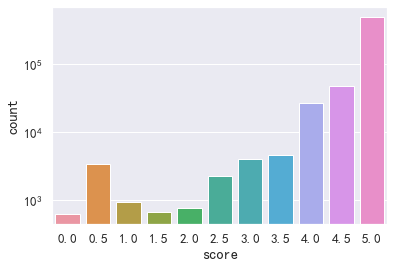

In [17]:
sns.countplot(x="score", data=data, log=True)

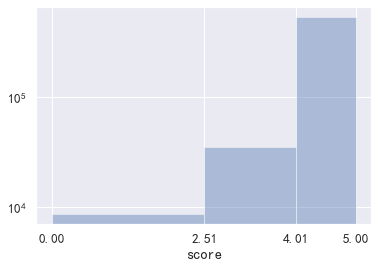

In [18]:
data_period = [0, 2.51, 4.01, 5]
# 也可以使用matplotlib来绘制直方图。
# plt.hist(data["score"], bins=data_period, log=True)
# bins指定的区间为左闭右开，最后一个区间为双闭。
ax = sns.distplot(data["score"], bins=data_period, hist_kws={"log": True}, kde=False)
# 让x轴显示的数值与bins指定的区间一致。
ax.set_xticks(data_period)

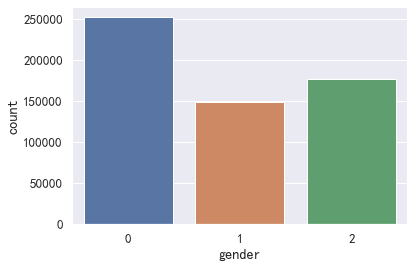

In [19]:
# 0：未知，1：男，2：女。
sns.countplot(x="gender", data=data)

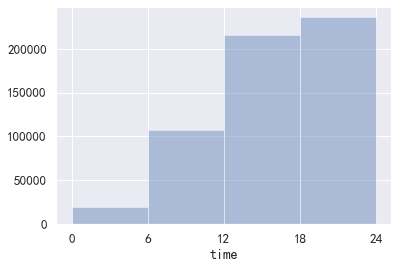

In [20]:
# 时间列的格式：2019-07-31 21:21:02
hour = data["time"].str.extract(r" (\d{2}):", expand=False)
hour = hour.astype(np.int32)
# 直方图的区间的前闭后开，最后一个区间双闭。
time_period = [0, 6, 12, 18, 24]
ax = sns.distplot(hour, bins=time_period, kde=False)
ax.set_xticks(time_period)

In [21]:
from itertools import chain
from collections import Counter

li_2d = data["comment"].tolist()
# 将二维列表扁平化为一维列表。
li_1d = list(chain.from_iterable(li_2d))
print(f"总词汇量：{len(li_1d)}")
c = Counter(li_1d)
print(f"不重复词汇数量：{len(c)}")
common = c.most_common(15)
print(common)

总词汇量：4107951
不重复词汇数量：86474
[('好看', 253127), ('哪吒', 89622), ('不错', 66558), ('电影', 64864), ('真的', 54514), ('国漫', 50663), ('国产', 43181), ('喜欢', 39873), ('剧情', 37878), ('太', 37583), ('超级', 36612), ('挺', 31547), ('搞笑', 31235), ('感动', 30276), ('笑', 29937)]


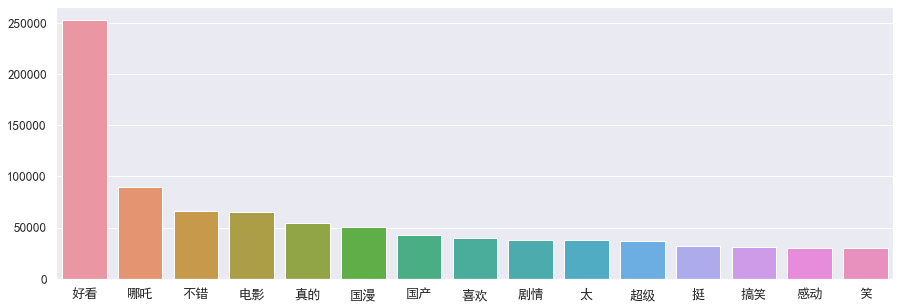

In [22]:
d = dict(common)
plt.figure(figsize=(15, 5))
# seaborn内部不支持dict_keys与dict_values类型，maplotlib.bar可以。
sns.barplot(list(d.keys()), list(d.values()))

['6.16%', '2.18%', '1.62%', '1.58%', '1.33%', '1.23%', '1.05%', '0.97%', '0.92%', '0.91%', '0.89%', '0.77%', '0.76%', '0.74%', '0.73%']


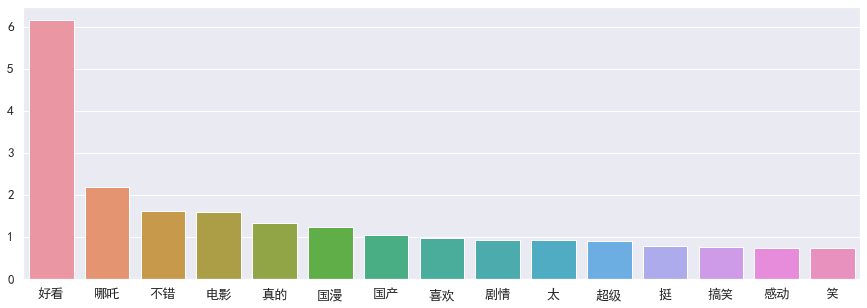

In [23]:
total = len(li_1d)
percentage = [v * 100 / total for v in d.values()]
print([f"{v:.2f}%" for v in percentage])
plt.figure(figsize=(15, 5))
sns.barplot(list(d.keys()), percentage)

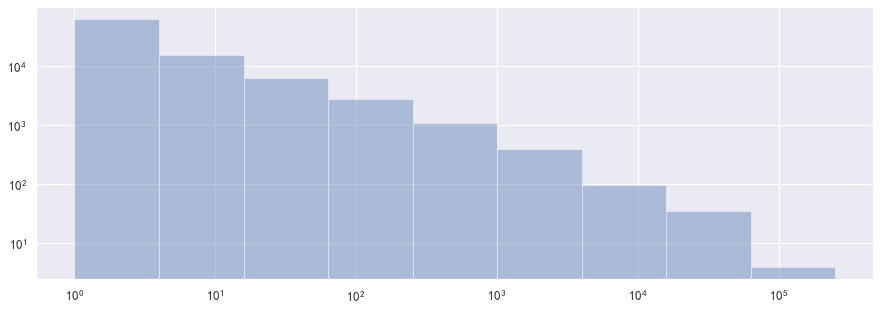

In [24]:
plt.figure(figsize=(15, 5))
v = list(c.values())
end = np.log10(max(v))
ax = sns.distplot(v, bins=np.logspace(0, end, num=10), hist_kws={"log": True},
kde=False)
ax.set_xscale("log")

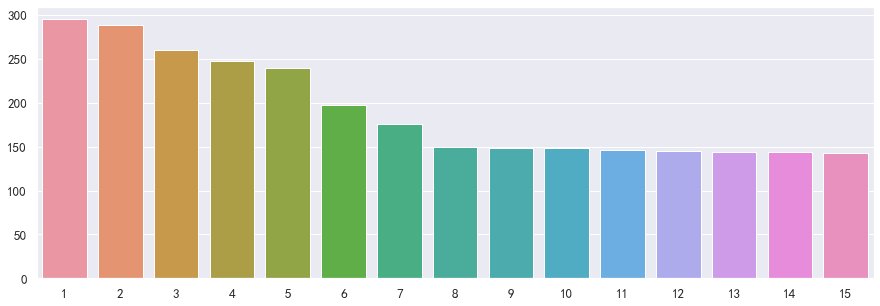

In [25]:
plt.figure(figsize=(15, 5))
# 计算每个评论的用词数。
num = [len(li) for li in li_2d]
# 统计用词最多的前15个评论。
length = 15
sns.barplot(np.arange(1, length + 1), sorted(num, reverse=True)[:length])

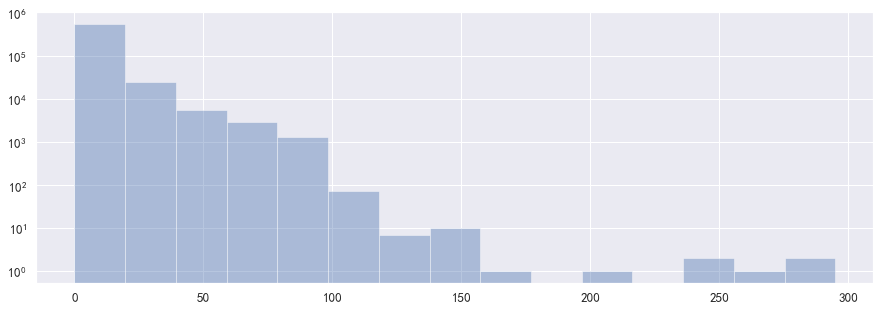

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.distplot(num, bins=15, hist_kws={"log": True}, kde=False)

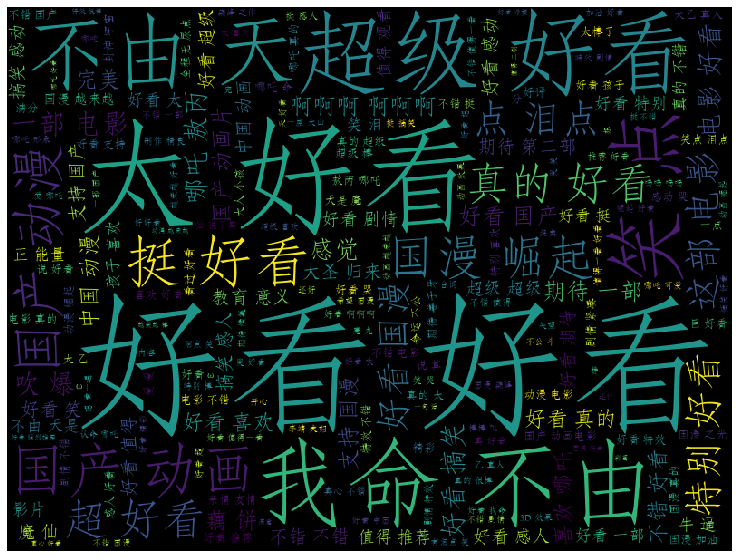

In [27]:
from wordcloud import WordCloud
# 需要指定字体的位置，否则中文无法正常显示。
wc = WordCloud(font_path=r"C:/Windows/Fonts/STFANGSO.ttf", width=800, height=600)
# WordCloud要求传递的词汇使用空格分开的字符串。
join_words = " ".join(li_1d)
img = wc.generate(join_words)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
# 将图像保存到本地。
wc.to_file("wordcloud.png")

(-0.5, 394.5, 311.5, -0.5)

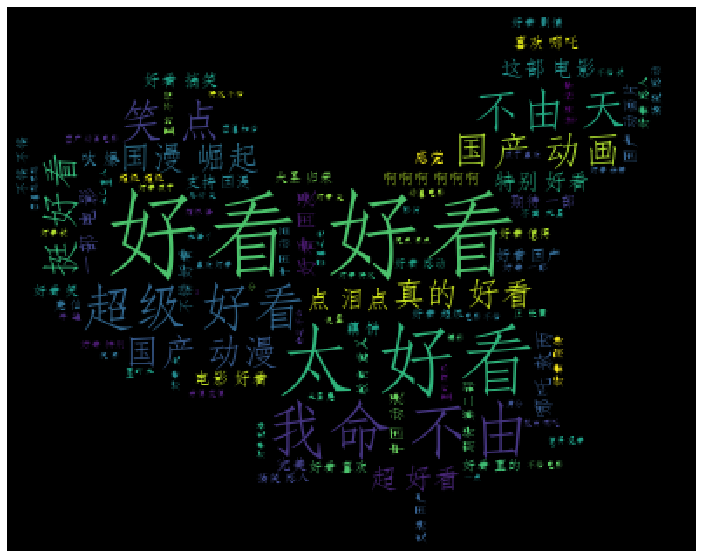

In [30]:
wc = WordCloud(font_path=r"C:/Windows/Fonts/STFANGSO.ttf", 
               mask=plt.imread("map.jpg"))
img = wc.generate(join_words)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')

(-0.5, 394.5, 311.5, -0.5)

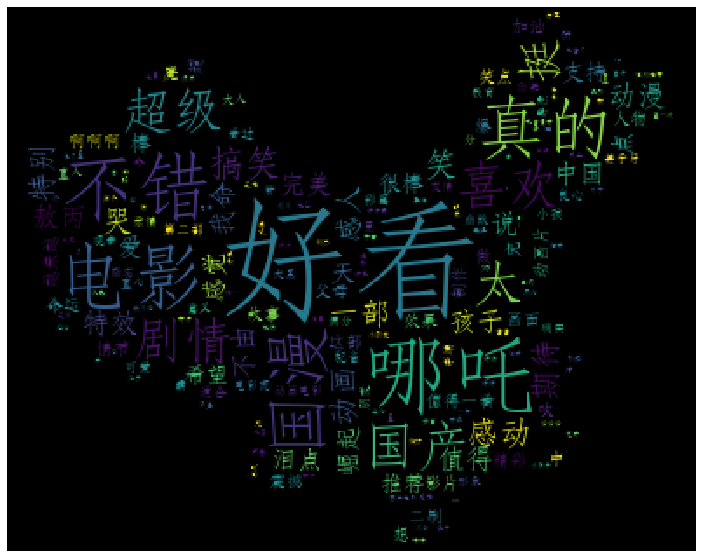

In [31]:
plt.figure(figsize=(15, 10))
img = wc.generate_from_frequencies(c)
plt.imshow(img)
plt.axis('off')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = [ "Where there is a will, there is a way.", "There is no royal road to learning.", ] 
bag = count.fit_transform(docs)
# bag是一个稀疏的矩阵。
print(bag)
# 调用稀疏矩阵的toarray方法，将稀疏矩阵转换为ndarray对象（稠密矩阵）。
print(bag.toarray())

  (0, 8)	1
  (0, 5)	2
  (0, 0)	2
  (0, 9)	1
  (0, 7)	1
  (1, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]


In [33]:
# 获取每个特征对应的单词。
print(count.get_feature_names())
# 输出单词与编号的映射关系。
print(count.vocabulary_)

['is', 'learning', 'no', 'road', 'royal', 'there', 'to', 'way', 'where', 'will']
{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'royal': 4, 'road': 3, 'to': 6, 'learning': 1}


In [34]:
test_docs = ["While there is life there is hope.", "No pain, no gain."]
t = count.transform(test_docs)
print(t.toarray())

[[2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
docs = ["Where there is a will, there is a way.",
        "There is no royal road to learning.",] 
bag = count.fit_transform(docs)
tfidf = TfidfTransformer()
t = tfidf.fit_transform(bag)
# TfidfTransformer转换的结果也是稀疏矩阵。
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["Where there is a will, there is a way.",
        "There is no royal road to learning.",] 
tfidf = TfidfVectorizer()
t = tfidf.fit_transform(docs)
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


In [37]:
def join(text_list):
    return " ".join(text_list)

data["comment"] = data["comment"].apply(join)
data.sample(5)

,time,city,gender,level,score,comment
303584,2019-08-02 10:45:10,许昌,0,3,5.0,剧情 紧凑 拖拉 笑点 泪点 合适 画风 制作 精美 特效 不用说 一级 棒
480653,2019-07-28 16:55:19,莱州,2,3,5.0,超级 赞
163943,2019-08-05 22:15:37,嘉兴,0,2,5.0,好看 好看 好看
575474,2019-07-26 13:52:31,利辛,2,2,5.0,不错 不错 画风 完美
525275,2019-07-27 17:40:46,深圳,0,3,5.0,国漫 崛起 超赞


In [38]:
data["target"] = np.where(data["score"] >= 4.5, 2, np.where(data["score"] >= 3, 1, 0))
data["target"].value_counts()

2    534733
1     35260
0      8539
Name: target, dtype: int64

In [39]:
p = data[data["target"] == 2]
m = data[data["target"] == 1]
n = data[data["target"] == 0]
p = p.sample(len(m))
data2 = pd.concat([p, m, n], axis=0)
data2["target"].value_counts()

1    35260
2    35260
0     8539
Name: target, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X = data2["comment"]
y = data2["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("训练集样本数：", y_train.shape[0], "测试集样本数：", y_test.shape[0])

训练集样本数： 59294 测试集样本数： 19765


In [41]:
vec = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=1)
X_train_tran = vec.fit_transform(X_train)
X_test_tran = vec.transform(X_test)
display(X_train_tran, X_test_tran)

<59294x215241 sparse matrix of type '<class 'numpy.float64'>'
	with 687427 stored elements in Compressed Sparse Row format>

<19765x215241 sparse matrix of type '<class 'numpy.float64'>'
	with 173501 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.feature_selection import f_classif

# 根据y进行分组，计算X中，每个特征的F值与P值。
# F值越大，P值越小。
f_classif(X_train_tran, y_train)

(array([0.55566862, 0.62238929, 0.61967632, ..., 0.61967632, 0.62238929,
        0.62238929]),
 array([0.57369154, 0.53666417, 0.53812207, ..., 0.53812207, 0.53666417,
        0.53666417]))

In [43]:
from sklearn.feature_selection import SelectKBest

# tf-idf值不需要太多的精度，使用32位的浮点数表示足矣。
X_train_tran = X_train_tran.astype(np.float32)
X_test_tran = X_test_tran.astype(np.float32)
# 定义特征选择器，用来选择最好的k个特征。
selector = SelectKBest(f_classif, k=min(20000, X_train_tran.shape[1]))
selector.fit(X_train_tran, y_train)
# 对训练集与测试集进行转换（选择特征）
X_train_tran = selector.transform(X_train_tran)
X_test_tran = selector.transform(X_test_tran)
print(X_train_tran.shape, X_test_tran.shape)

(59294, 20000) (19765, 20000)


In [44]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import ComplementNB

gnb = ComplementNB()
gnb.fit(X_train_tran, y_train)
y_hat = gnb.predict(X_test_tran)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.39      0.41      0.40      2137
           1       0.67      0.62      0.65      8782
           2       0.71      0.75      0.73      8846

    accuracy                           0.66     19765
   macro avg       0.59      0.59      0.59     19765
weighted avg       0.66      0.66      0.66     19765

